# Volatility 

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
import statsmodels as sm

In [2]:
# Create our portfolio
tickers = ['^MERV']
 
# Set the investment weights, the number of weights must be equal to the number of tickets 
weights = np.array([1])
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2018-04-01", end=dt.date.today())['Close']
 
#From the closing prices, calculate periodic returns
returns = data.pct_change()

print (returns)

Symbols        ^MERV
Date                
2018-04-03       NaN
2018-04-04 -0.000721
2018-04-05  0.017503
2018-04-06 -0.004012
2018-04-09  0.003329
2018-04-10  0.011869
2018-04-11 -0.005945
2018-04-12  0.000248
2018-04-13 -0.013911
2018-04-16 -0.018526
2018-04-17  0.012738
2018-04-18  0.004112
2018-04-19 -0.007947
2018-04-20 -0.003824
2018-04-23 -0.007080
2018-04-24 -0.012030
2018-04-25 -0.020348
2018-04-26 -0.015327
2018-04-27  0.017585
2018-05-02 -0.013076
2018-05-03 -0.003734
2018-05-04 -0.032204
2018-05-07 -0.036448
2018-05-08 -0.044926
2018-05-09  0.062086
2018-05-10  0.060654
2018-05-11  0.008493
2018-05-14  0.019749
2018-05-15  0.007731
2018-05-16  0.032064
...              ...
2020-01-28  0.030934
2020-01-29 -0.011959
2020-01-30  0.001327
2020-01-31 -0.007177
2020-02-03  0.036704
2020-02-04 -0.013067
2020-02-05 -0.006499
2020-02-06  0.003409
2020-02-07  0.007525
2020-02-10 -0.003905
2020-02-11 -0.029924
2020-02-12  0.002804
2020-02-13 -0.031718
2020-02-14 -0.000563
2020-02-17  0

In [3]:
returns.describe()

Symbols,^MERV
count,473.000000
mean,0.000604
std,0.032991
min,-0.379309
25%,-0.014598
50%,0.000870
75%,0.017361
max,0.102204


In [4]:
moving_std = returns.rolling(20).std()

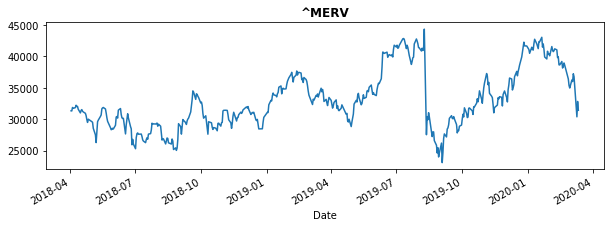

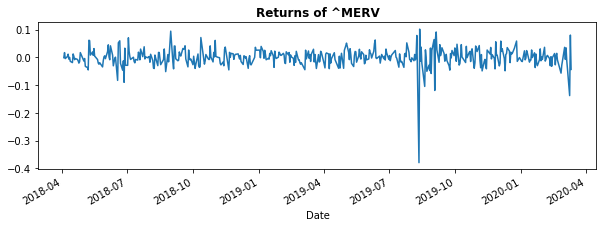

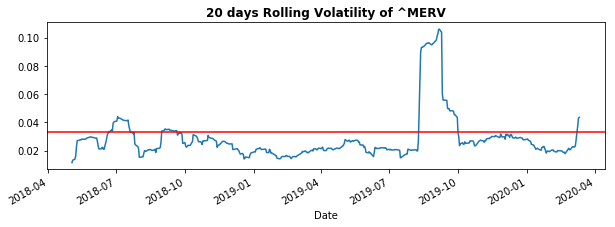

In [7]:
for ticker in tickers:
    fig = plt.figure()
    fig.set_size_inches(10,3)
    data[ticker].plot(y="close")
    plt.title(ticker, weight="bold");
    
    fig = plt.figure()
    fig.set_size_inches(10,3)
    returns[ticker].plot(y="close")
    plt.title('Returns of {}'.format(ticker), weight="bold");
    
    fig = plt.figure()
    fig.set_size_inches(10,3)
    moving_std[ticker].plot(y="close")
    plt.title('20 days Rolling Volatility of {}'.format(ticker), weight="bold")
    plt.axhline(y=returns[ticker].std(), color='red', linestyle='solid')    